In [2]:
import pandas as pd
from datetime import datetime
import os
from dotenv import load_dotenv, find_dotenv
import openai

In [3]:
df = pd.read_csv('./data/cleaned-youtube-desk-setup.csv')
df.head()

,video_id,title,channel,release_date,transcript_text,word_count
0,8cZtbjI5FnQ,My NEW Ultimate Desk Setup &amp; Office Tour 2...,UrAvgConsumer,2023-09-30 16:21:44,what's going on guys it's your average consume...,2856
1,gYgaxdUAAS0,My NEW Ultimate Desk &amp; Setup Tour 2023!,Techno Tim,2023-10-21 15:00:58,What's up everyone? How's it going? So this pa...,3674
2,D43lCHSdrSo,The ALL-ROUNDER Desk Setup - Build &amp; Tour ...,ThisIsE,2023-10-21 13:18:22,this video is brought to you by ug green I've ...,2528
3,KwW-m69tAz8,My ultimate DREAM desk setup (2023),Patrick Rambles,2023-07-04 13:00:13,so guys ever since I've moved into this new st...,3168
4,SjcvBFfMulY,My Productivity Desk Setup (2023),Ali Abdaal,2023-09-19 13:00:32,foreign welcome back to the channel and to m...,4503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         417 non-null    object
 1   title            417 non-null    object
 2   channel          417 non-null    object
 3   release_date     417 non-null    object
 4   transcript_text  417 non-null    object
 5   word_count       417 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 19.7+ KB


In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['video_id'].drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   video_id         417 non-null    object        
 1   title            417 non-null    object        
 2   channel          417 non-null    object        
 3   release_date     417 non-null    datetime64[ns]
 4   transcript_text  417 non-null    object        
 5   word_count       417 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 19.7+ KB


In [6]:
df.head()

,video_id,title,channel,release_date,transcript_text,word_count
0,8cZtbjI5FnQ,My NEW Ultimate Desk Setup &amp; Office Tour 2...,UrAvgConsumer,2023-09-30 16:21:44,what's going on guys it's your average consume...,2856
1,gYgaxdUAAS0,My NEW Ultimate Desk &amp; Setup Tour 2023!,Techno Tim,2023-10-21 15:00:58,What's up everyone? How's it going? So this pa...,3674
2,D43lCHSdrSo,The ALL-ROUNDER Desk Setup - Build &amp; Tour ...,ThisIsE,2023-10-21 13:18:22,this video is brought to you by ug green I've ...,2528
3,KwW-m69tAz8,My ultimate DREAM desk setup (2023),Patrick Rambles,2023-07-04 13:00:13,so guys ever since I've moved into this new st...,3168
4,SjcvBFfMulY,My Productivity Desk Setup (2023),Ali Abdaal,2023-09-19 13:00:32,foreign welcome back to the channel and to m...,4503


In [7]:
for index, row in df.iterrows():
    if 'Mac' in row['transcript_text']:
        df.loc[index, 'OS'] = 'Mac'
    elif 'PC' in row['transcript_text'] or 'Windows' in row['transcript_text']:
        df.loc[index, 'OS'] = 'PC'
    else:
        df.loc[index, 'OS'] = 'NA'

In [8]:
df['OS'].value_counts()

Mac    275
PC      87
NA      55
Name: OS, dtype: int64

In [9]:
df[df['OS']=='NA'].sample(5)

,video_id,title,channel,release_date,transcript_text,word_count,OS
226,1MZ28zxEPjE,How to Build Your Own ANIMATION STUDIO SETUP |...,NobleFrugal Studio,2023-03-12 14:00:11,let's put together an ergonomic digital art w...,2046,NA
118,kkgwl_Fxw5U,The BEST Desk for Gaming Setups in 2023,Big E,2023-01-03 17:45:47,today we go over the best desks for gaming set...,2876,NA
76,v8UMb6mw73U,10 Unique Desk Accessories You Didn’t Know You...,Andrew Ethan Zeng,2023-08-29 11:00:44,"Desk setup upgrades can be very expensive, I ...",1810,NA
355,ZliOaJufpyI,How to Maximize Your Bedroom Workspace | 2023 ...,Amira Richie,2023-03-03 17:00:24,thank you hi friends welcome back thanks for ...,540,NA
213,BWelmBCt-LU,My 2023 minimalist WFH standing desk setup (ft...,Melinda Tse Films,2023-08-11 17:56:19,okay thank you hey what's up it's all here an...,1369,NA


In [11]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns


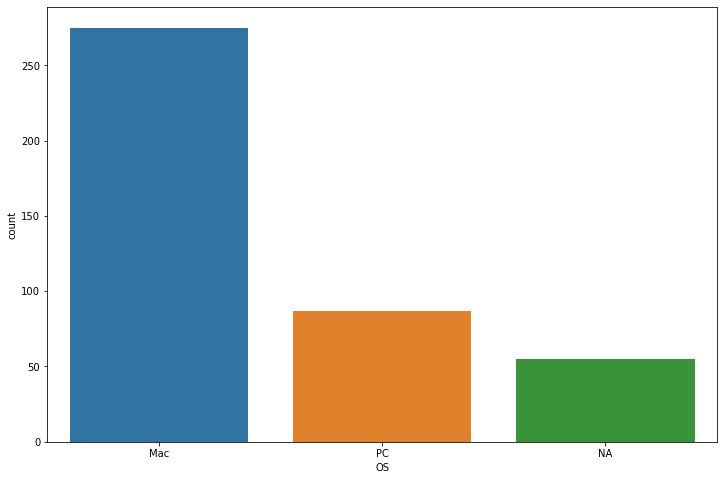

In [12]:


plt.figure(figsize=(12, 8))
sns.countplot(x='OS', data=df)
plt.show()

In [13]:
# try to find out what mouse is the most popular
# create column contains 100 words of transcript before and  after the first occurence of the word 'mouse'
# then pass the column to LLM to extract what type of mouse is used

for index, row in df.iterrows():
    if 'mouse' in row['transcript_text']:
        words = row['transcript_text'].split()
        try:
            mouse_index = words.index('mouse')
        except ValueError:
            mouse_index = None
        if mouse_index is not None:
            start_index = max(0, mouse_index - 250)
            end_index = min(len(words), mouse_index + 251)
            context_words = words[start_index:end_index]
            context = ' '.join(context_words)
            df.loc[index, 'mouse_context'] = context
        else:
            df.loc[index, 'mouse_context'] = 'NA'
    else:
        df.loc[index, 'mouse_context'] = 'NA'


In [14]:
df['mouse_context'].sample(15)

14     has the controls built in which means less clu...
275    are planning on fitting this within your desk ...
264    be a magician many moons ago I saw another mag...
48     my MacBook connected to the charger at all it ...
98                                                    NA
30     the webcam using gestures like putting your ha...
36     a lot making the iPad almost as great in a set...
300    processor for video editing but I decided to u...
266    whole lot more than that for cable management ...
190    let me show you how I further modified or exte...
156                                                   NA
397    ever use my dt990 Pros when at the desk I used...
284    will have this one linked down below if you're...
313                                                   NA
278                                                   NA
Name: mouse_context, dtype: object

In [15]:
from dotenv import load_dotenv, find_dotenv
import requests

load_dotenv(find_dotenv())

hf_api_key = os.environ.get("HF_API_KEY")

#API_URL = "https://api-inference.huggingface.co/models/distilbert-base-cased-distilled-squad"
API_URL = "https://api-inference.huggingface.co/models/deepset/roberta-base-squad2"
headers = {"Authorization": f"Bearer {hf_api_key}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	

In [16]:
for index, row in df.iterrows():
    if row['mouse_context'] != ' NA':
        ans = {'answer': 'NA'}
        try :
            ans = query({
            "inputs": {
                "question": "What is the name of the computer mouse?",
                "context": row['mouse_context']
                    }
                })
            df.loc[index, 'mouse'] = ans['answer']
            print(index, ans['answer'])
        except:
            df.loc[index, 'mouse'] = 'NA'
    else:
        df.loc[index, 'mouse'] = 'NA'


0 NA
1 super high DPI mouse
2 Gladius 3 Gladius Gladius
3 Logitech MX Master 3s
4 Logitech MX Master 3s Mouse
5 mxm 3
6 NA
7 V3 Mouse
8 magic mouse
9 Logitech MX Master 3s
10 Logitech mx3
11 Logitech MX Master III
12 Logitech mxm 3s
13 MX Master 3s
14 MX Master 3s
15 Logitech MX Master 3s
16 Logitech MX Master 3s
17 cinder
18 Groove
19 MX Master
20 Logitech MX Master 3
21 NA
22 Logitech MX monster 3s
23 Razer Basilisk V3 Pro
24 Microsoft Arc 2 Mouse
25 Mac Studio
26 basus
27 Razer Orochi V2
28 gimbal
29 Logitech mxm 3s
30 Logitech MX master
31 keyboard
32 NA
33 Logitech G Pro X
34 Logitech
35 NA
36 g502x
37 MX Master 2s
38 NA
39 lodgy MX Master 3s Mouse
40 NA
41 ergonomic Mouse from Logitech
42 g502 Lightspeed
43 keyboard
44 NA
45 NA
46 Carpio 2.0
47 Logitech
48 Logitech MX Masters 3
49 keyboard
50 Halo 65
51 NA
52 NA
53 m-book mode
54 MX Master Mouse
55 gaming mouse pad
56 NA
57 NA
58 rocat cone XP air mouse
59 Razer
60 MX Master 3s
61 TS3
62 Logitech craft
63 MX Master 3s
64 NA
65 MX

In [17]:
df['mouse'].sample(5)

387               NA
258    my MX monster
93       gaming mice
152               NA
185           Debbie
Name: mouse, dtype: object

In [18]:
df['mouse'].value_counts()

NA                        125
keyboard                   15
MX Master 3s               10
Logitech MX Master 3s      10
Logitech MX Master III      8
                         ... 
jelly comb                  1
Pomodoro Timer              1
Flint                       1
touchpad                    1
G-Force                     1
Name: mouse, Length: 200, dtype: int64

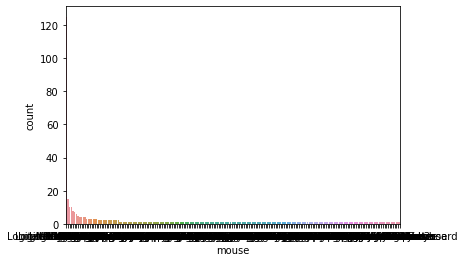

In [19]:
sns.countplot(x='mouse', data=df, order=df['mouse'].value_counts().index)
plt.show()

In [20]:
df.to_csv('./data/LLM-cleaned-data.csv', index=False)